<a href="https://colab.research.google.com/github/MaDufie/ml_journey/blob/main/flight_arrival_delay_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight Arrival Delay Prediction**

In [ ]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Preparation**

##  Import dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/My ML Journey/flight_arrival_delay_prediction/T_ONTIME_MARKETING_2405.csv')
# # Take a random 10% sample of the data
# sampled_data = df.sample(frac=0.1, random_state=1)

# # Save the sampled data to a new CSV file
# sampled_data.to_csv('sampled_data.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/My ML Journey/flight_arrival_delay_prediction/T_ONTIME_MARKETING_2405.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2024,2,5,1,3,5/1/2024 12:00:00 AM,AA,1,12478,JFK,...,389.0,363.0,336.0,1.0,2475.0,NaN,NaN,NaN,NaN,NaN
1,2024,2,5,1,3,5/1/2024 12:00:00 AM,AA,10,12892,LAX,...,330.0,326.0,298.0,1.0,2475.0,NaN,NaN,NaN,NaN,NaN
2,2024,2,5,1,3,5/1/2024 12:00:00 AM,AA,1002,15919,XNA,...,82.0,71.0,48.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN
3,2024,2,5,1,3,5/1/2024 12:00:00 AM,AA,1003,11292,DEN,...,237.0,234.0,207.0,1.0,1709.0,NaN,NaN,NaN,NaN,NaN
4,2024,2,5,1,3,5/1/2024 12:00:00 AM,AA,1004,10721,BOS,...,149.0,157.0,113.0,1.0,728.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(649428, 38)

## Check for missing values and dublicate rows

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
YEAR,0
QUARTER,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
FL_DATE,0
MKT_UNIQUE_CARRIER,0
MKT_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0


In [ ]:
df.nunique()

,0
YEAR,1
QUARTER,1
MONTH,1
DAY_OF_MONTH,31
DAY_OF_WEEK,7
FL_DATE,31
MKT_UNIQUE_CARRIER,10
MKT_CARRIER_FL_NUM,6402
ORIGIN_AIRPORT_ID,352
ORIGIN,352


In [ ]:
# Check for duplicate rows
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Display the duplicate rows
duplicate_rows = df[duplicates]

print(f"Number of duplicate rows: {num_duplicates}")
print("Duplicate rows:")
print(duplicate_rows)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [YEAR, QUARTER, MONTH, DAY_OF_MONTH, DAY_OF_WEEK, FL_DATE, MKT_UNIQUE_CARRIER, MKT_CARRIER_FL_NUM, ORIGIN_AIRPORT_ID, ORIGIN, ORIGIN_CITY_NAME, ORIGIN_STATE_ABR, DEST_AIRPORT_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, DEP_DELAY_NEW, DEP_DELAY_GROUP, TAXI_OUT, TAXI_IN, CRS_ARR_TIME, ARR_TIME, ARR_DELAY, ARR_DELAY_NEW, ARR_DELAY_GROUP, CRS_ELAPSED_TIME, ACTUAL_ELAPSED_TIME, AIR_TIME, FLIGHTS, DISTANCE, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY]
Index: []

[0 rows x 38 columns]


In [ ]:
# Drop unnedded columns and remove rows with null values in 'ARR_DELAY_NEW'
data_cleaned = df.drop(columns=['FL_DATE', 'FLIGHTS', 'DEP_DELAY_GROUP', 'ARR_DELAY_GROUP'])
data_cleaned = data_cleaned.dropna(subset=['ARR_DELAY_NEW'])

# Remove rows where 'DAY_OF_WEEK' has a value of 9
data_cleaned = data_cleaned[data_cleaned['DAY_OF_WEEK'] != 9]

# Reset the index after dropping rows
data_cleaned.reset_index(drop=True, inplace=True)

# Convert time columns (CRS_DEP_TIME, DEP_TIME, CRS_ARR_TIME, ARR_TIME) to hour only (HH)
def extract_hour(time_val):
    return int(time_val // 100)

time_columns = ['CRS_DEP_TIME', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME']
for col in time_columns:
    data_cleaned[col] = data_cleaned[col].apply(extract_hour)

In [ ]:
data_cleaned[time_columns].head()

,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME
0,9,9,12,12
1,22,22,7,6
2,6,6,7,7
3,0,0,6,6
4,8,7,10,10


In [ ]:
data_cleaned.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,...,ARR_DELAY_NEW,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2024,2,5,1,3,AA,1,12478,JFK,"New York, NY",...,0.0,389.0,363.0,336.0,2475.0,NaN,NaN,NaN,NaN,NaN
1,2024,2,5,1,3,AA,10,12892,LAX,"Los Angeles, CA",...,0.0,330.0,326.0,298.0,2475.0,NaN,NaN,NaN,NaN,NaN
2,2024,2,5,1,3,AA,1002,15919,XNA,"Fayetteville, AR",...,7.0,82.0,71.0,48.0,280.0,NaN,NaN,NaN,NaN,NaN
3,2024,2,5,1,3,AA,1003,11292,DEN,"Denver, CO",...,0.0,237.0,234.0,207.0,1709.0,NaN,NaN,NaN,NaN,NaN
4,2024,2,5,1,3,AA,1004,10721,BOS,"Boston, MA",...,1.0,149.0,157.0,113.0,728.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_cleaned.isnull().sum()

,0
YEAR,0
QUARTER,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
MKT_UNIQUE_CARRIER,0
MKT_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0
ORIGIN_CITY_NAME,0


In [ ]:
data_cleaned.shape

(637694, 34)

## Feature Engineering

### Time of Day
*   Create a new feature to determine if the flight was in the morning or evening


In [ ]:
def get_time_of_day(hour):
    if hour is None:
        return None
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

data_cleaned['CRS_DEP_TIME_OF_DAY'] = data_cleaned['CRS_DEP_TIME'].apply(get_time_of_day)
data_cleaned['CRS_ARR_TIME_OF_DAY'] = data_cleaned['CRS_ARR_TIME'].apply(get_time_of_day)

data_cleaned.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_TIME_OF_DAY,CRS_ARR_TIME_OF_DAY
0,2024,2,5,1,3,AA,1,12478,JFK,"New York, NY",...,363.0,336.0,2475.0,NaN,NaN,NaN,NaN,NaN,Morning,Afternoon
1,2024,2,5,1,3,AA,10,12892,LAX,"Los Angeles, CA",...,326.0,298.0,2475.0,NaN,NaN,NaN,NaN,NaN,Night,Morning
2,2024,2,5,1,3,AA,1002,15919,XNA,"Fayetteville, AR",...,71.0,48.0,280.0,NaN,NaN,NaN,NaN,NaN,Morning,Morning
3,2024,2,5,1,3,AA,1003,11292,DEN,"Denver, CO",...,234.0,207.0,1709.0,NaN,NaN,NaN,NaN,NaN,Night,Morning
4,2024,2,5,1,3,AA,1004,10721,BOS,"Boston, MA",...,157.0,113.0,728.0,NaN,NaN,NaN,NaN,NaN,Morning,Morning


### Arrival Delayed
*   Create a new column DELAYED where the value is 1 if ARR_DELAY_NEW is 15 minutes or more, and 0 if it's less than 15 minutes.

In [ ]:
data_cleaned['DELAYED'] = data_cleaned['ARR_DELAY_NEW'].apply(lambda x: 1 if x >= 15 else 0)
data_cleaned['DELAYED'].value_counts(normalize=True)

,proportion
DELAYED,
0,0.738908
1,0.261092


## **Exploratory Data Analysis**

In [ ]:
summary_statistics = data_cleaned.describe()
summary_statistics

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAYED
count,637694.0,637694.0,637694.0,637694.000000,637694.000000,637694.000000,637694.000000,637694.000000,637694.000000,637694.000000,...,637694.000000,637694.000000,637694.000000,637694.000000,166497.000000,166497.000000,166497.000000,166497.000000,166497.000000,637694.000000
mean,2024.0,2.0,5.0,16.004416,3.978345,2684.905547,12652.588839,12653.455719,13.031294,13.091931,...,142.600379,138.717684,112.402165,806.296244,22.812321,5.751737,15.396398,0.104669,33.265056,0.261092
std,0.0,0.0,0.0,8.942767,1.915974,1767.780175,1528.599530,1529.157185,4.894029,5.149471,...,71.390529,71.935840,69.965607,590.315345,71.689198,36.775560,35.239231,3.320672,67.775335,0.439230
min,2024.0,2.0,5.0,1.000000,1.000000,1.000000,10135.000000,10135.000000,0.000000,0.000000,...,22.000000,16.000000,8.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024.0,2.0,5.0,8.000000,2.000000,1223.000000,11292.000000,11292.000000,9.000000,9.000000,...,90.000000,86.000000,61.000000,377.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024.0,2.0,5.0,16.000000,4.000000,2333.000000,12889.000000,12889.000000,13.000000,13.000000,...,125.000000,121.000000,95.000000,647.000000,2.000000,0.000000,1.000000,0.000000,7.000000,0.000000
75%,2024.0,2.0,5.0,24.000000,5.000000,4054.000000,14057.000000,14057.000000,17.000000,17.000000,...,172.000000,169.000000,142.000000,1042.000000,19.000000,0.000000,18.000000,0.000000,40.000000,1.000000
max,2024.0,2.0,5.0,31.000000,7.000000,9694.000000,16869.000000,16869.000000,23.000000,24.000000,...,670.000000,723.000000,649.000000,5095.000000,2911.000000,1728.000000,1320.000000,656.000000,2034.000000,1.000000


### Arrival Delays

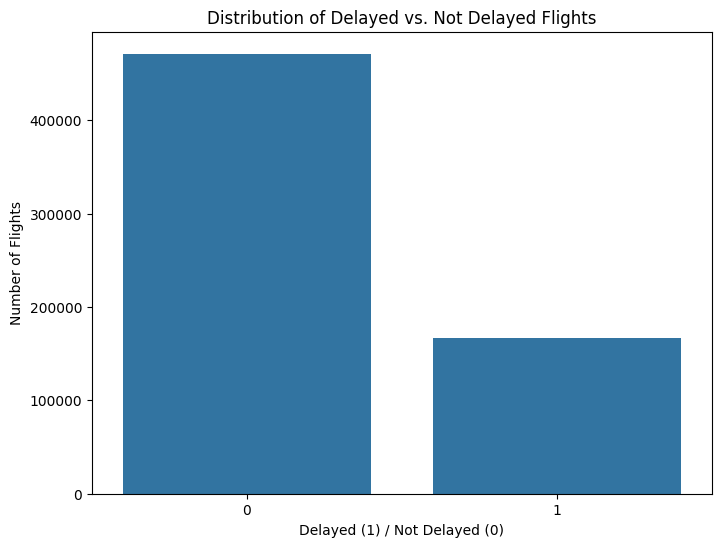

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='DELAYED', data=data_cleaned)
plt.title('Distribution of Delayed vs. Not Delayed Flights')
plt.xlabel('Delayed (1) / Not Delayed (0)')
plt.ylabel('Number of Flights')
plt.show()


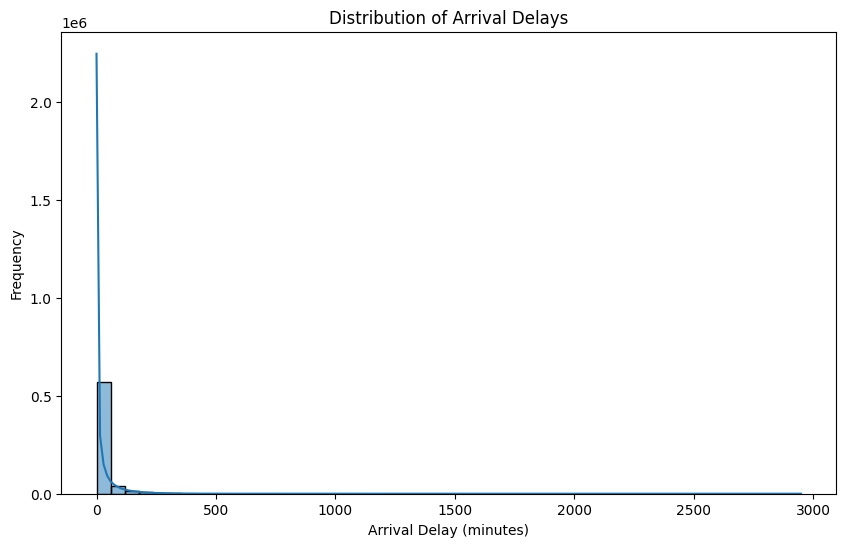

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['ARR_DELAY_NEW'], bins=50, kde=True)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

### Day of the Week vs Arrival Delayed Flights



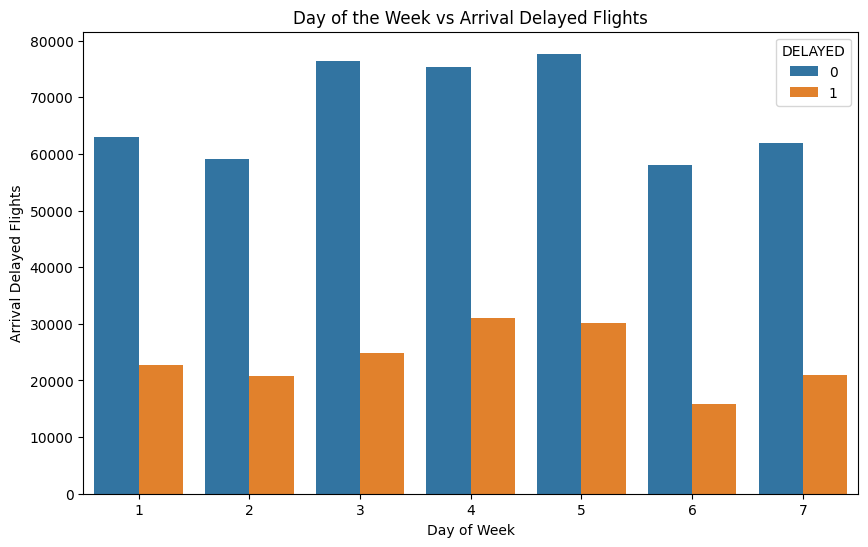

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data_cleaned, x='DAY_OF_WEEK', hue='DELAYED')

plt.title('Day of the Week vs Arrival Delayed Flights')
plt.xlabel('Day of Week')
plt.ylabel('Arrival Delayed Flights')
plt.show()

### Departure Time of Day vs Arrival Delayed Flights

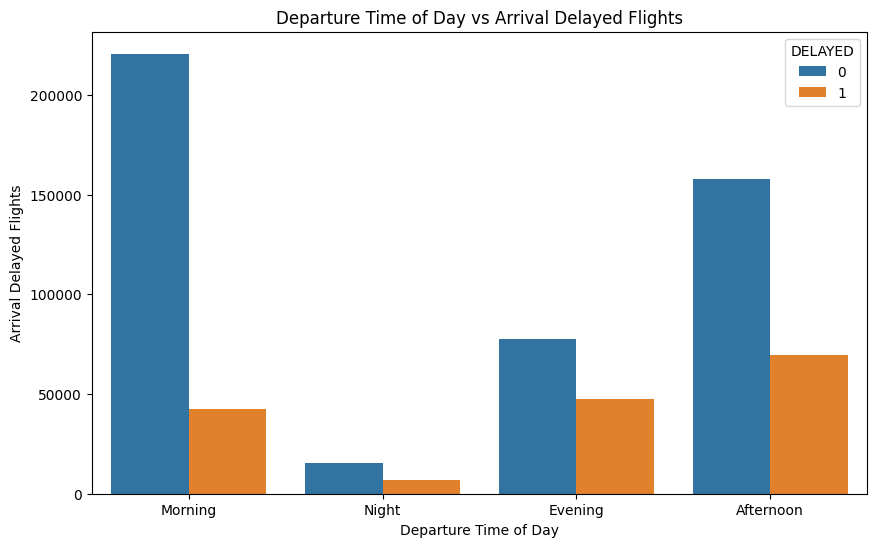

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data_cleaned, x='CRS_DEP_TIME_OF_DAY', hue='DELAYED')

plt.title('Departure Time of Day vs Arrival Delayed Flights')
plt.xlabel('Departure Time of Day')
plt.ylabel('Arrival Delayed Flights')
plt.show()


### Arrival Time of Day vs Arrival Delayed Flights

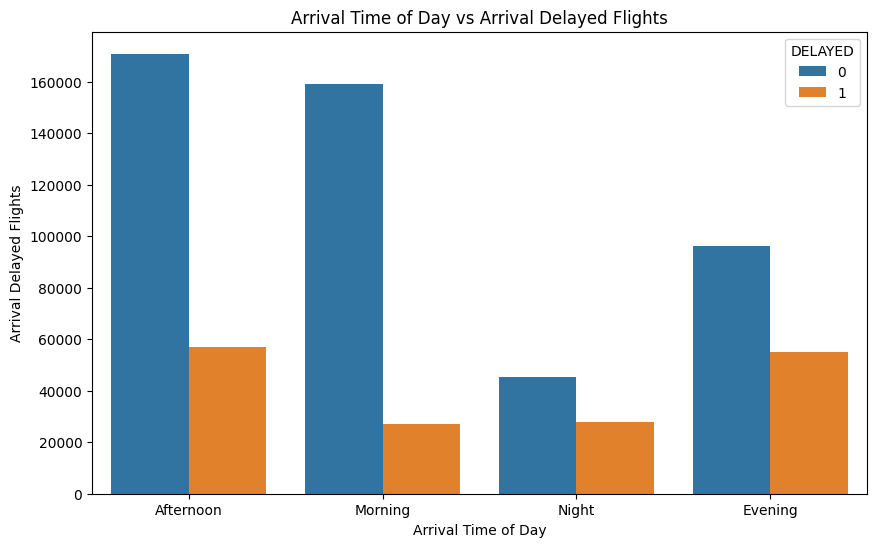

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data_cleaned, x='CRS_ARR_TIME_OF_DAY', hue='DELAYED')

plt.title('Arrival Time of Day vs Arrival Delayed Flights')
plt.xlabel('Arrival Time of Day')
plt.ylabel('Arrival Delayed Flights')
plt.show()


### Time of day most flights arrive

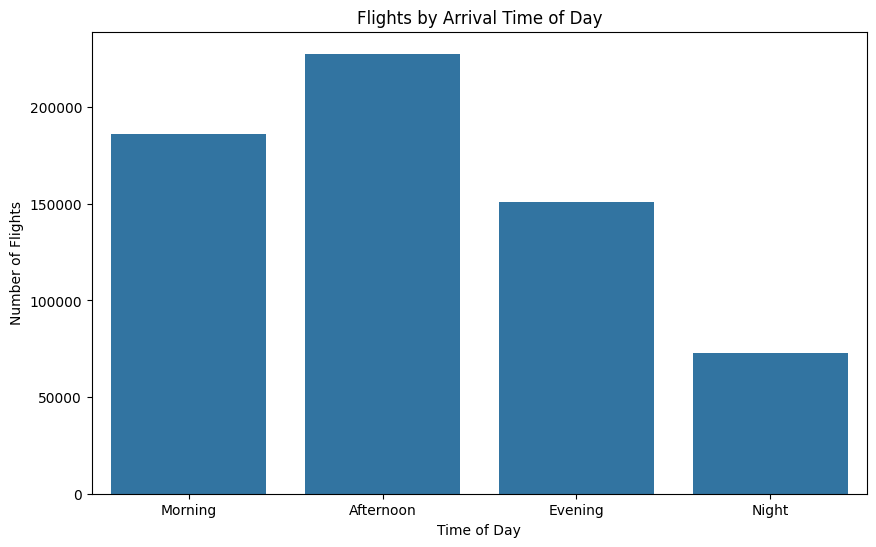

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=data_cleaned, x='CRS_ARR_TIME_OF_DAY', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Flights by Arrival Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Flights')
plt.show()

### Carrier Performance in Terms of Arrival Delays

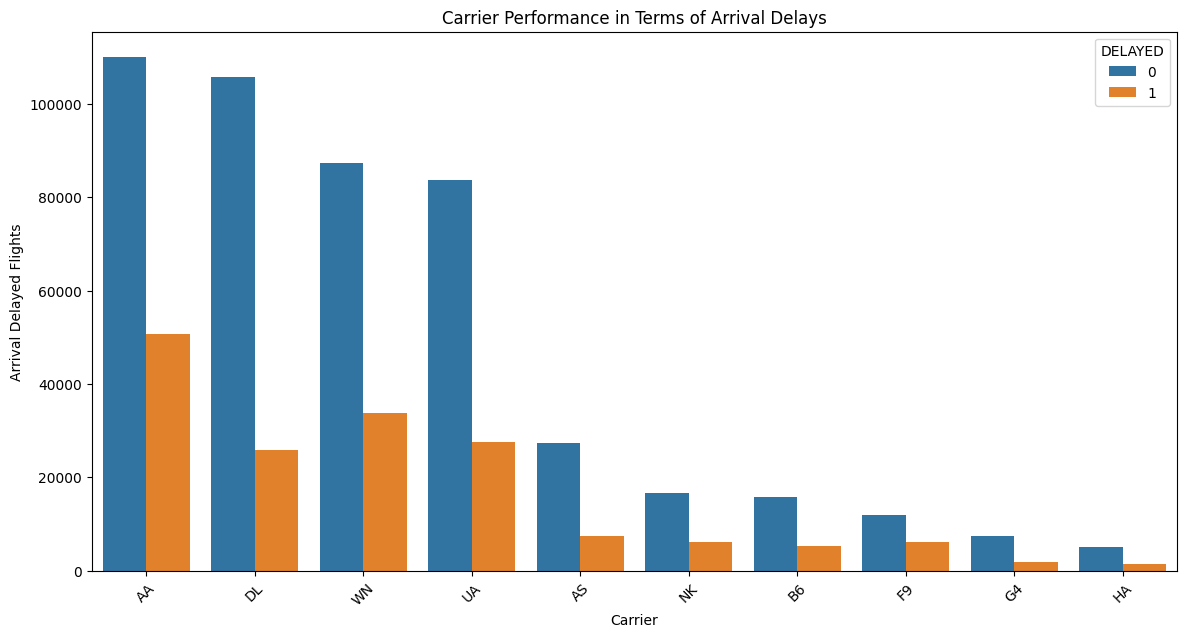

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(data=data_cleaned, x='MKT_UNIQUE_CARRIER', hue='DELAYED', order=df['MKT_UNIQUE_CARRIER'].value_counts().index)

plt.title('Carrier Performance in Terms of Arrival Delays')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delayed Flights')
plt.xticks(rotation=45)
plt.show()

### Flight Distance vs. Arrival Delay

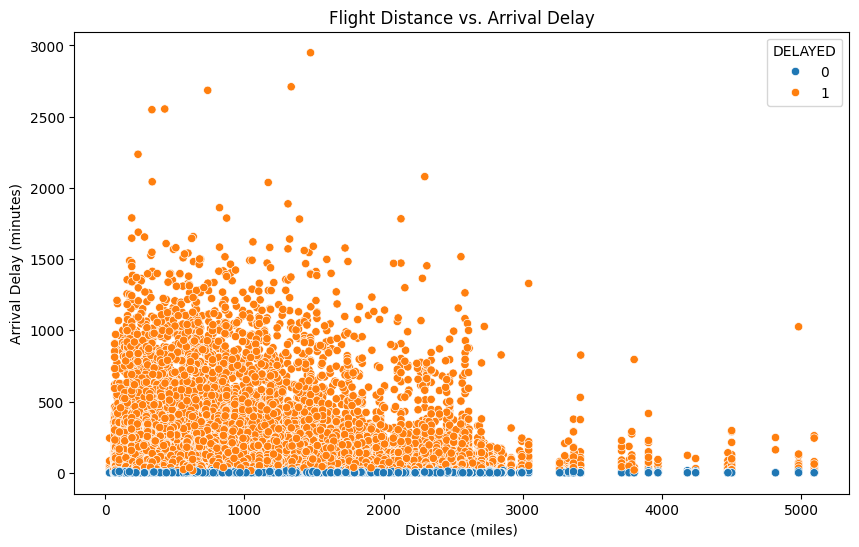

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='DISTANCE', y='ARR_DELAY_NEW', hue='DELAYED', data=data_cleaned)
plt.title('Flight Distance vs. Arrival Delay')
plt.xlabel('Distance (miles)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

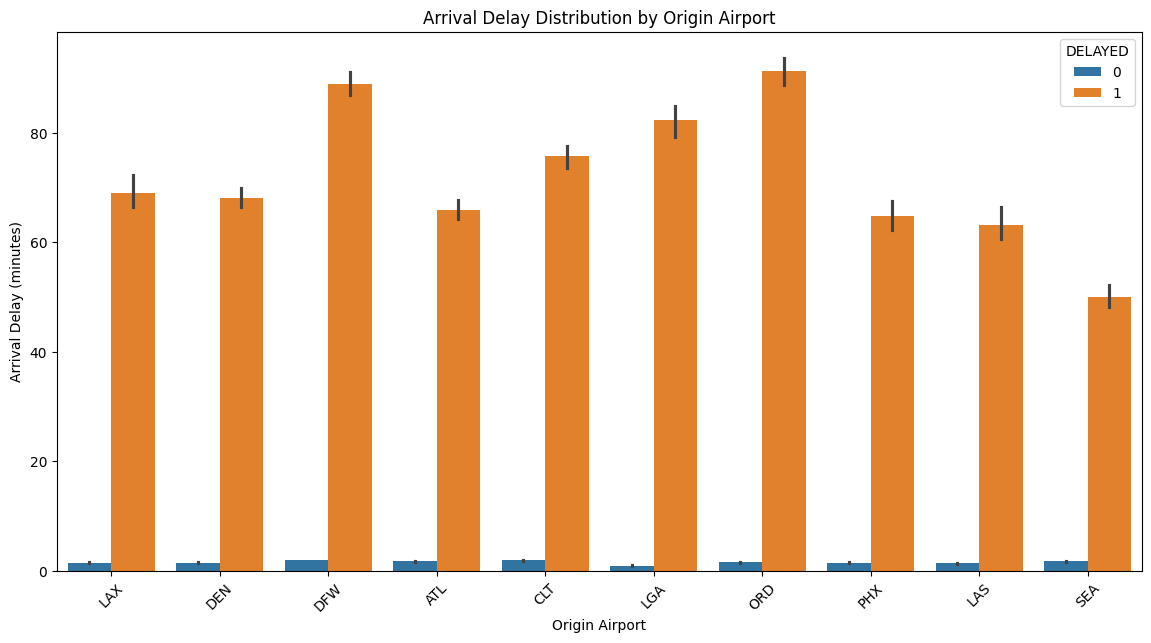

In [ ]:
top_airports = data_cleaned['ORIGIN'].value_counts().head(10).index
plt.figure(figsize=(14,7))
sns.barplot(data=data_cleaned[data_cleaned['ORIGIN'].isin(top_airports)], x='ORIGIN', y='ARR_DELAY_NEW', hue='DELAYED')
plt.title('Arrival Delay Distribution by Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

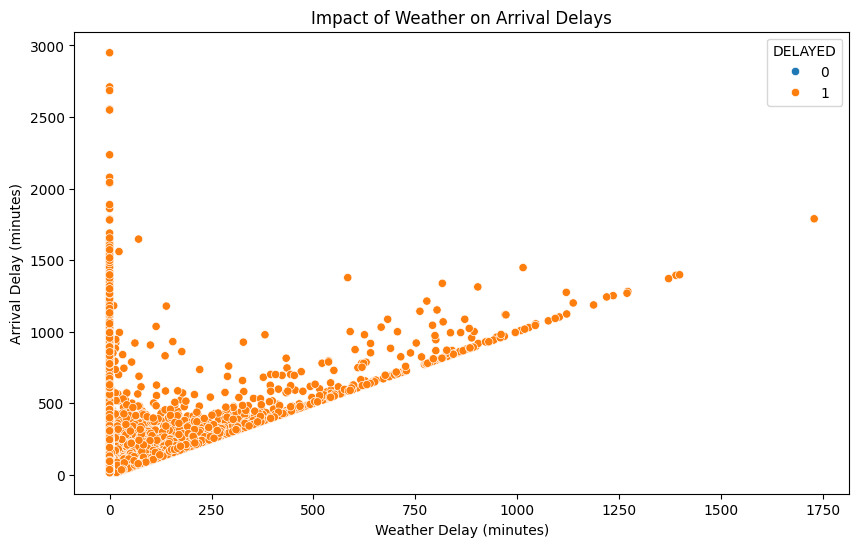

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_cleaned, x='WEATHER_DELAY', y='ARR_DELAY_NEW', hue="DELAYED")
plt.title('Impact of Weather on Arrival Delays')
plt.xlabel('Weather Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()


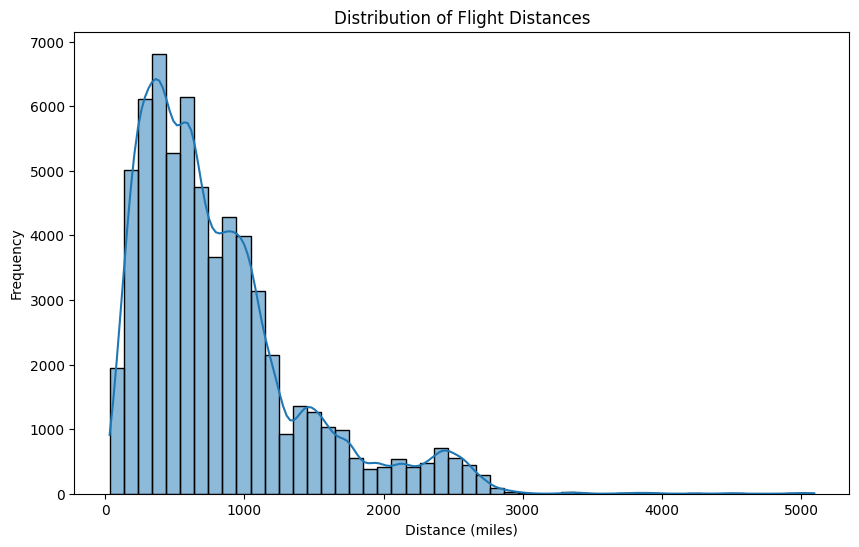

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned['DISTANCE'], bins=50, kde=True)
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()


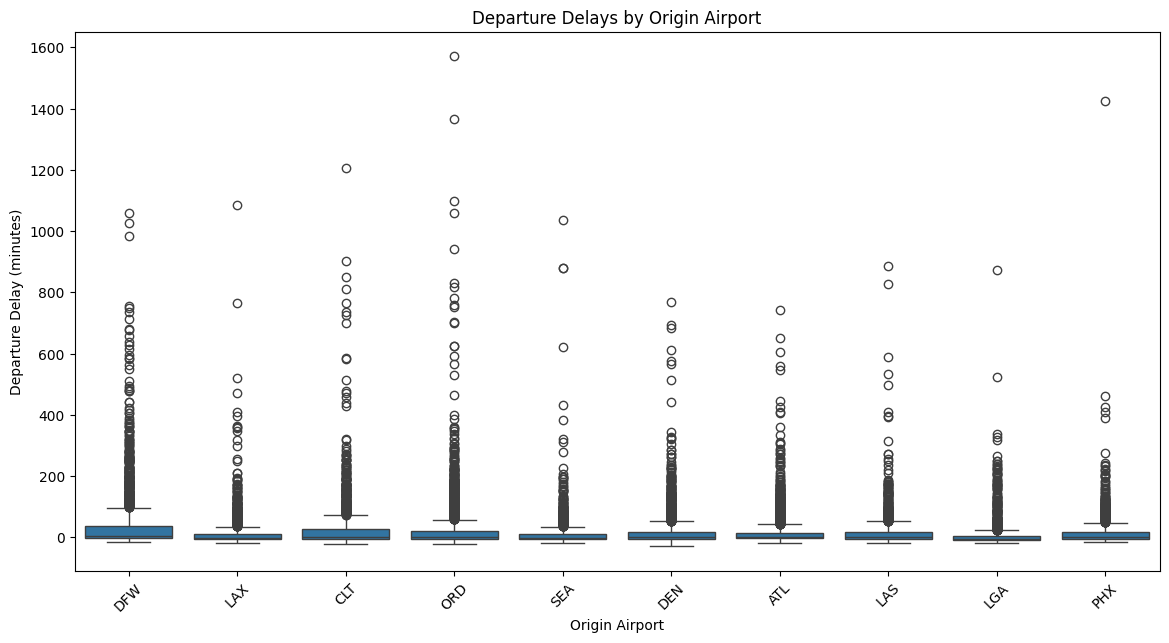

In [ ]:
top_airports = data_cleaned['ORIGIN'].value_counts().head(10).index
plt.figure(figsize=(14,7))
sns.boxplot(data=data_cleaned[data_cleaned['ORIGIN'].isin(top_airports)], x='ORIGIN', y='DEP_DELAY')
plt.title('Departure Delays by Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


                     YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  \
YEAR                  NaN      NaN    NaN           NaN          NaN   
QUARTER               NaN      NaN    NaN           NaN          NaN   
MONTH                 NaN      NaN    NaN           NaN          NaN   
DAY_OF_MONTH          NaN      NaN    NaN      1.000000    -0.049117   
DAY_OF_WEEK           NaN      NaN    NaN     -0.049117     1.000000   
MKT_CARRIER_FL_NUM    NaN      NaN    NaN     -0.003259    -0.010466   
ORIGIN_AIRPORT_ID     NaN      NaN    NaN     -0.001029     0.002021   
DEST_AIRPORT_ID       NaN      NaN    NaN     -0.000189     0.002077   
CRS_DEP_TIME          NaN      NaN    NaN      0.000451     0.002714   
DEP_TIME              NaN      NaN    NaN      0.000243     0.001171   
DEP_DELAY             NaN      NaN    NaN      0.028928    -0.018534   
DEP_DELAY_NEW         NaN      NaN    NaN      0.028660    -0.018761   
TAXI_OUT              NaN      NaN    NaN      0.007082    -0.00

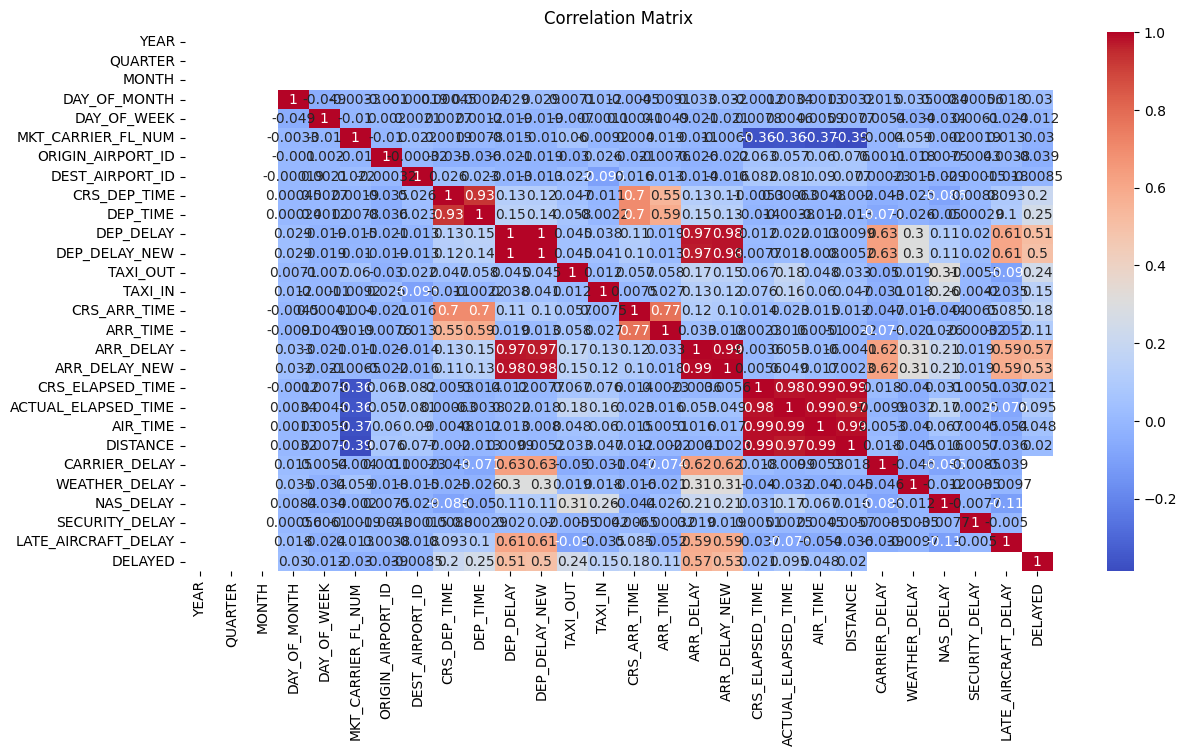

In [ ]:
plt.figure(figsize=(14,7))
numerical_df = data_cleaned.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#  **Predictive Modeling**

In [ ]:
data_cleaned

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,...,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_TIME_OF_DAY,CRS_ARR_TIME_OF_DAY,DELAYED
0,2024,2,5,1,3,AA,1,12478,JFK,"New York, NY",...,336.0,2475.0,NaN,NaN,NaN,NaN,NaN,Morning,Afternoon,0
1,2024,2,5,1,3,AA,10,12892,LAX,"Los Angeles, CA",...,298.0,2475.0,NaN,NaN,NaN,NaN,NaN,Night,Morning,0
2,2024,2,5,1,3,AA,1002,15919,XNA,"Fayetteville, AR",...,48.0,280.0,NaN,NaN,NaN,NaN,NaN,Morning,Morning,0
3,2024,2,5,1,3,AA,1003,11292,DEN,"Denver, CO",...,207.0,1709.0,NaN,NaN,NaN,NaN,NaN,Night,Morning,0
4,2024,2,5,1,3,AA,1004,10721,BOS,"Boston, MA",...,113.0,728.0,NaN,NaN,NaN,NaN,NaN,Morning,Morning,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637689,2024,2,5,31,5,WN,994,11292,DEN,"Denver, CO",...,105.0,776.0,NaN,NaN,NaN,NaN,NaN,Afternoon,Afternoon,0
637690,2024,2,5,31,5,WN,994,14262,PSP,"Palm Springs, CA",...,70.0,439.0,NaN,NaN,NaN,NaN,NaN,Evening,Evening,0
637691,2024,2,5,31,5,WN,995,10821,BWI,"Baltimore, MD",...,125.0,946.0,NaN,NaN,NaN,NaN,NaN,Morning,Afternoon,0
637692,2024,2,5,31,5,WN,995,13198,MCI,"Kansas City, MO",...,124.0,967.0,NaN,NaN,NaN,NaN,NaN,Morning,Morning,0


In [ ]:
data = data_cleaned[['DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_UNIQUE_CARRIER', 'MKT_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ARR_DELAY_NEW']]
data.sample(10)

,DAY_OF_MONTH,DAY_OF_WEEK,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY_NEW
155917,8,3,NK,340,11433,13487,11,12,0.0
342663,17,5,NK,939,13303,12266,22,0,0.0
495614,24,5,WN,5761,12173,14107,8,17,0.0
336814,17,5,DL,1502,10397,11433,19,21,84.0
596816,30,4,AA,2837,13303,12892,20,22,64.0
427051,21,2,UA,4251,12264,14574,12,14,0.0
356258,18,6,AS,3412,14771,12892,17,18,0.0
526138,26,7,G4,924,14082,13230,8,10,31.0
360514,18,6,DL,5745,10821,12478,17,18,0.0
576265,29,3,AA,2507,13930,13303,8,12,37.0


                    DAY_OF_MONTH  DAY_OF_WEEK  MKT_CARRIER_FL_NUM  \
DAY_OF_MONTH            1.000000    -0.049117           -0.003259   
DAY_OF_WEEK            -0.049117     1.000000           -0.010466   
MKT_CARRIER_FL_NUM     -0.003259    -0.010466            1.000000   
ORIGIN_AIRPORT_ID      -0.001029     0.002021           -0.010279   
DEST_AIRPORT_ID        -0.000189     0.002077            0.021736   
CRS_DEP_TIME            0.000451     0.002714            0.001924   
CRS_ARR_TIME           -0.004546     0.000408            0.003951   
ARR_DELAY_NEW           0.031647    -0.021409           -0.006531   

                    ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID  CRS_DEP_TIME  \
DAY_OF_MONTH                -0.001029        -0.000189      0.000451   
DAY_OF_WEEK                  0.002021         0.002077      0.002714   
MKT_CARRIER_FL_NUM          -0.010279         0.021736      0.001924   
ORIGIN_AIRPORT_ID            1.000000        -0.000324     -0.034928   
DEST_AIRPORT_ID   

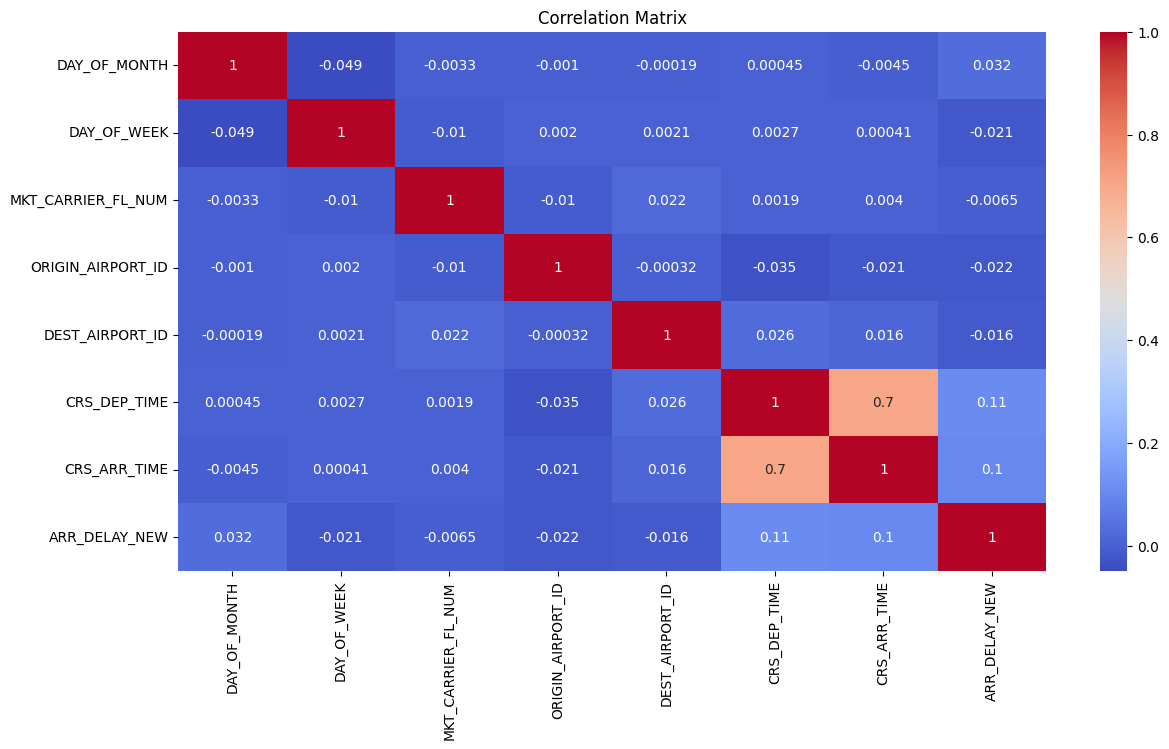

In [ ]:
plt.figure(figsize=(14,7))
numerical_df = data.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


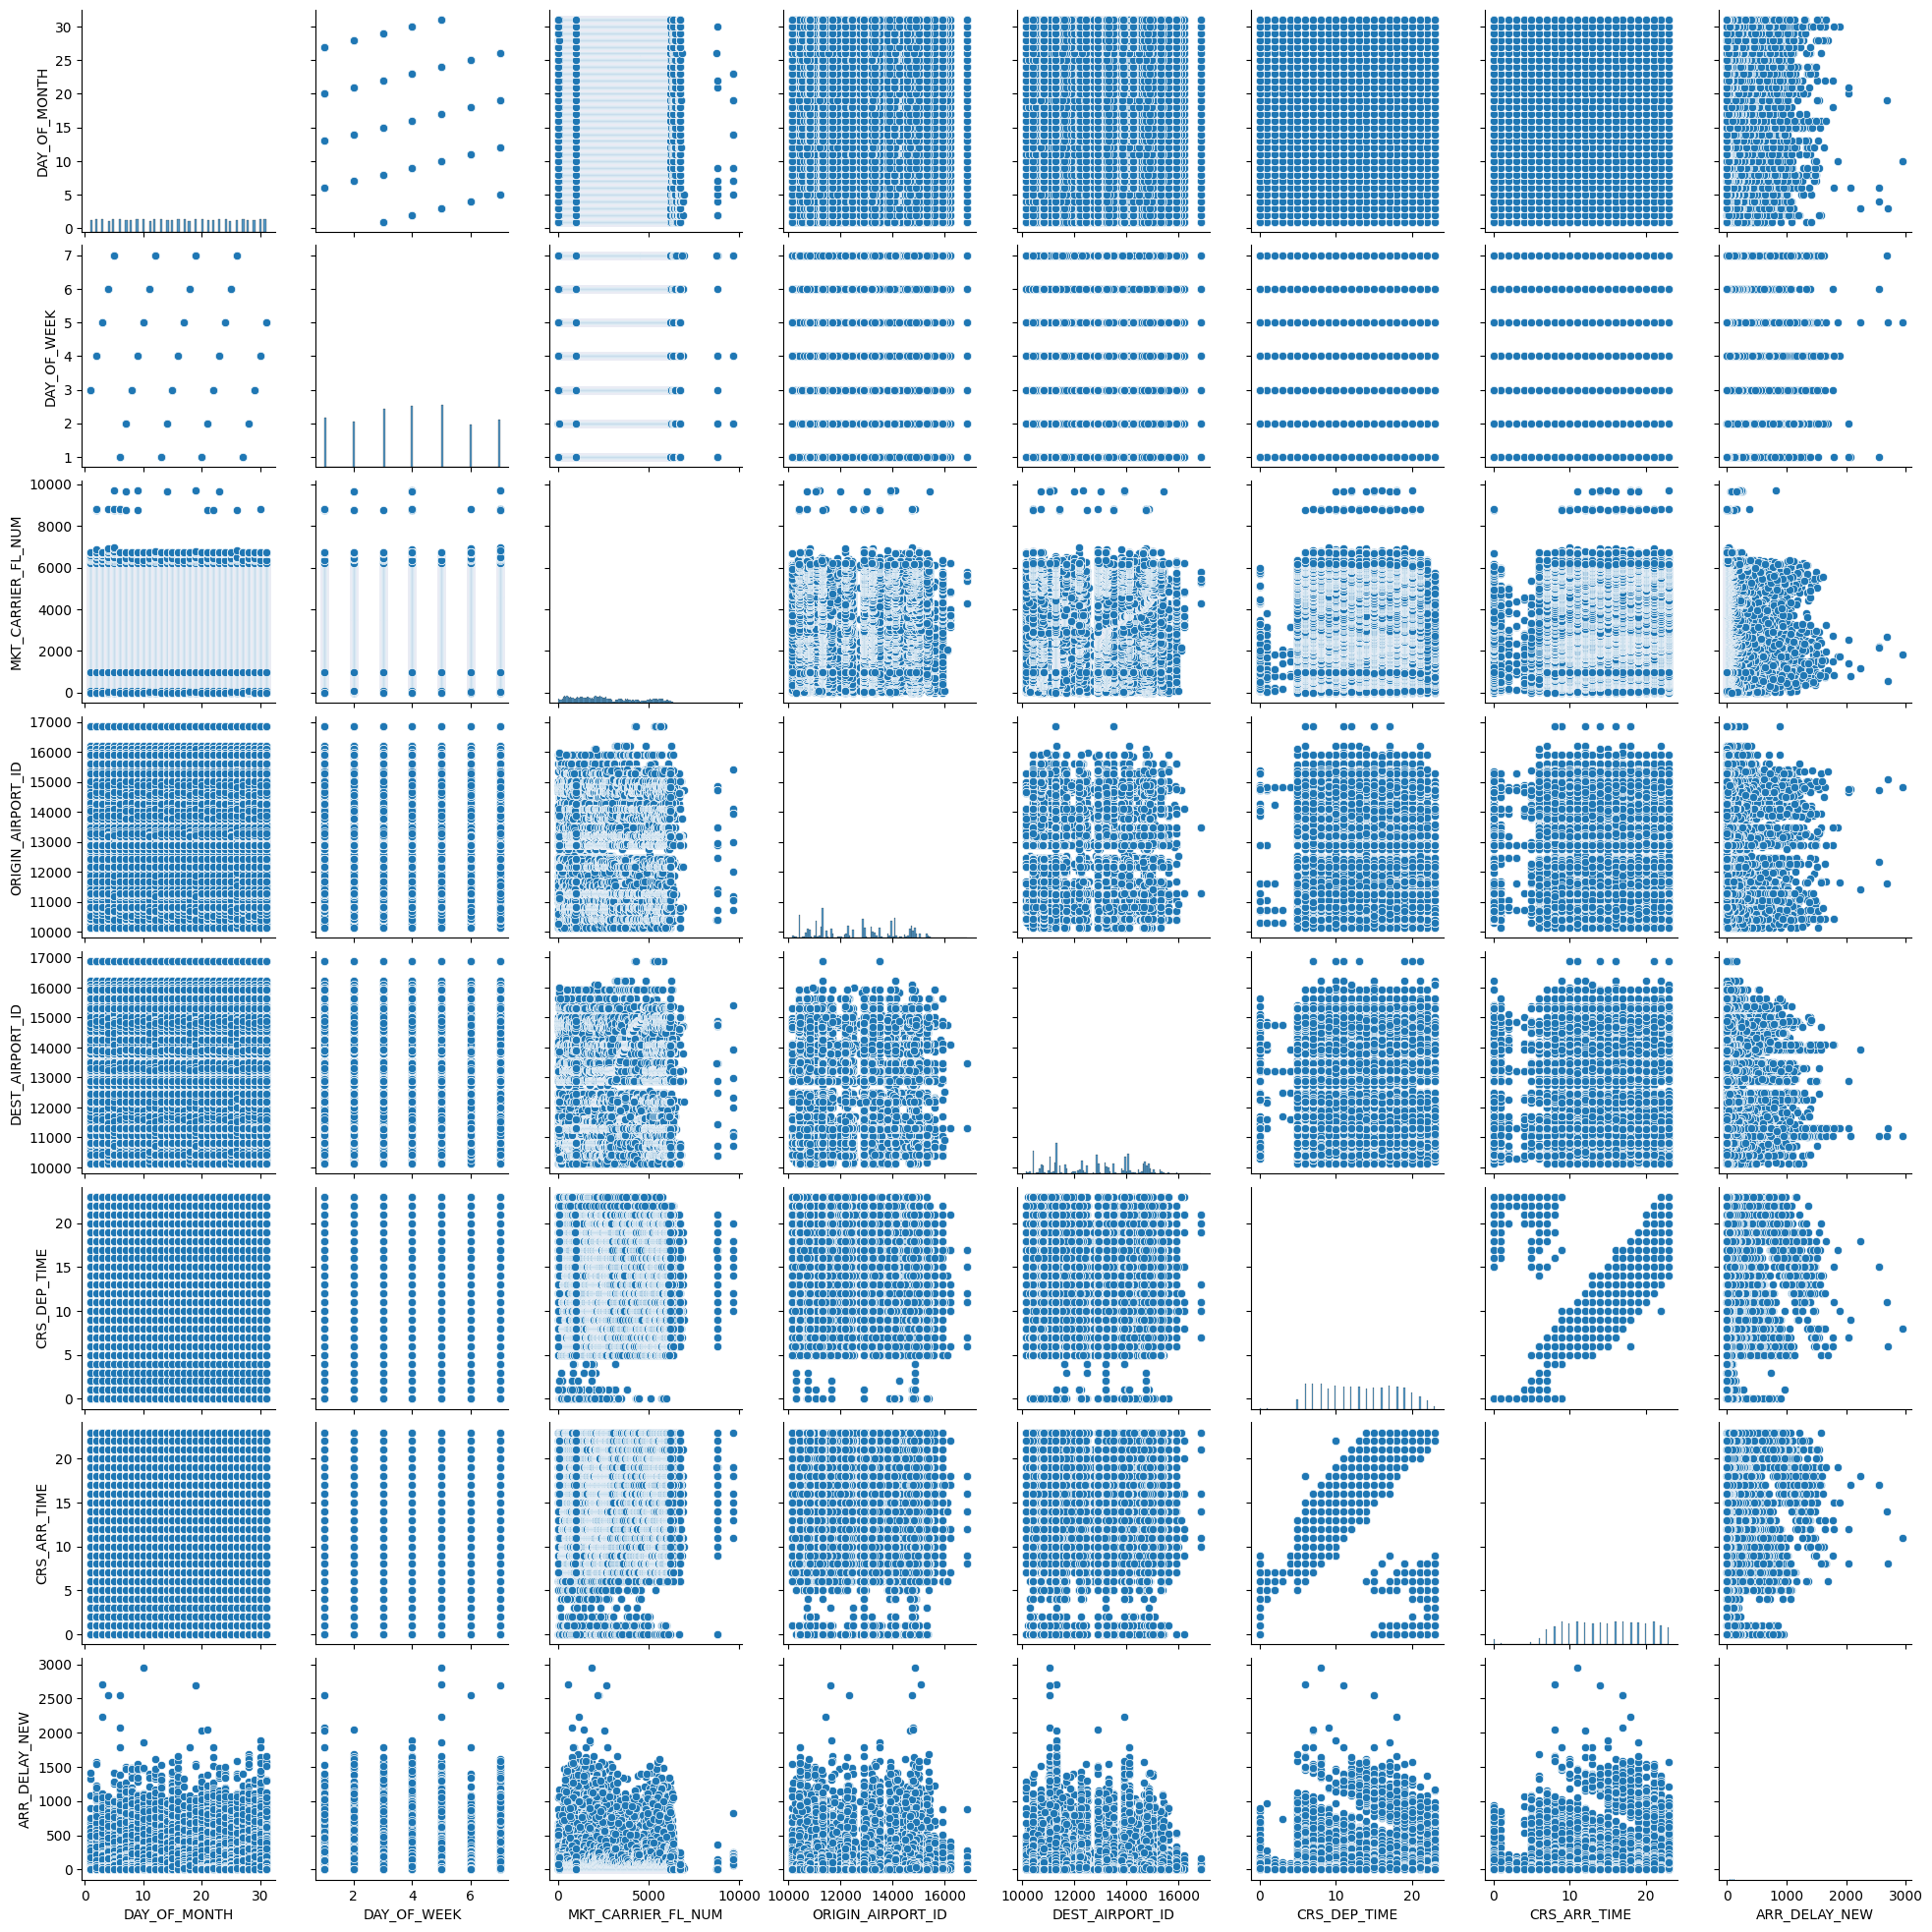

In [ ]:
sns.pairplot(data)